# EDA

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [0]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 58 columns):
id                892816 non-null int64
ps_ind_01         892816 non-null int64
ps_ind_02_cat     892816 non-null int64
ps_ind_03         892816 non-null int64
ps_ind_04_cat     892816 non-null int64
ps_ind_05_cat     892816 non-null int64
ps_ind_06_bin     892816 non-null int64
ps_ind_07_bin     892816 non-null int64
ps_ind_08_bin     892816 non-null int64
ps_ind_09_bin     892816 non-null int64
ps_ind_10_bin     892816 non-null int64
ps_ind_11_bin     892816 non-null int64
ps_ind_12_bin     892816 non-null int64
ps_ind_13_bin     892816 non-null int64
ps_ind_14         892816 non-null int64
ps_ind_15         892816 non-null int64
ps_ind_16_bin     892816 non-null int64
ps_ind_17_bin     892816 non-null int64
ps_ind_18_bin     892816 non-null int64
ps_reg_01         892816 non-null float64
ps_reg_02         892816 non-null float64
ps_reg_03         892816 non-null float64
ps_

In [0]:
def make_meta(df):
    data = []

    for f in df.columns:
        if f == 'target':
            role = 'target'
        elif f == 'id' :
            role = 'id'
        else:
            role = 'input'

        if 'bin' in f or f == 'target':
            level = 'binary'
        elif 'cat' in f or f == 'id':
            level = 'nominal'
        elif df[f].dtype == 'float64':
            level = 'interval'
        elif df[f].dtype == 'int64':
            level = 'ordinal'

        keep = True
        if f == 'id':
            keep = False

        dtype = df[f].dtype

        missing = False
        if df[f].apply(lambda x : x == -1).sum() > 0:
          missing = True

        f_dict = {
            'varname' : f,
            'role' : role,
            'level' : level,
            'keep' : keep,
            'dtype' : dtype,
            'missing' : missing    
        }
        data.append(f_dict)

    meta = pd.DataFrame(data, columns = ['varname', 'role', 'level', 'keep', 'dtype', 'missing'])
    meta.set_index('varname', inplace = True)
    return meta

In [0]:
meta_train = make_meta(train)
meta_test = make_meta(test)

In [0]:
meta_train

,role,level,keep,dtype,missing
varname,,,,,
id,id,nominal,False,int64,False
target,target,binary,True,int64,False
ps_ind_01,input,ordinal,True,int64,False
ps_ind_02_cat,input,nominal,True,int64,True
ps_ind_03,input,ordinal,True,int64,False
ps_ind_04_cat,input,nominal,True,int64,True
ps_ind_05_cat,input,nominal,True,int64,True
ps_ind_06_bin,input,binary,True,int64,False
ps_ind_07_bin,input,binary,True,int64,False


In [0]:
meta_test

,role,level,keep,dtype,missing
varname,,,,,
id,id,nominal,False,int64,False
ps_ind_01,input,ordinal,True,int64,False
ps_ind_02_cat,input,nominal,True,int64,True
ps_ind_03,input,ordinal,True,int64,False
ps_ind_04_cat,input,nominal,True,int64,True
ps_ind_05_cat,input,nominal,True,int64,True
ps_ind_06_bin,input,binary,True,int64,False
ps_ind_07_bin,input,binary,True,int64,False
ps_ind_08_bin,input,binary,True,int64,False


`target` 분포 확인

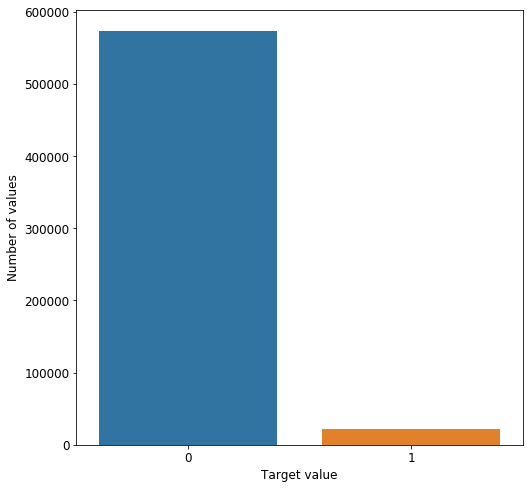

In [0]:
f, ax = plt.subplots(figsize=(8, 8))
x = train['target'].value_counts().index.values
y = train["target"].value_counts().values

sns.barplot(ax = ax, x = x, y = y)
plt.ylabel('Number of values', fontsize = 12)
plt.xlabel('Target value', fontsize = 12)
plt.tick_params(axis = 'both',
                which = 'major',
                labelsize = 12)

In [0]:
pd.DataFrame({'count' : meta_train.groupby(['role', 'level'])['level'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


In [0]:
pd.DataFrame({'count' : meta_test.groupby(['role', 'level'])['level'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16


In [0]:
train_copy = train.copy()
train_copy = train_copy.replace(-1, np.NaN)

test_copy = test.copy()
test_copy = test.replace(-1, np.NaN)

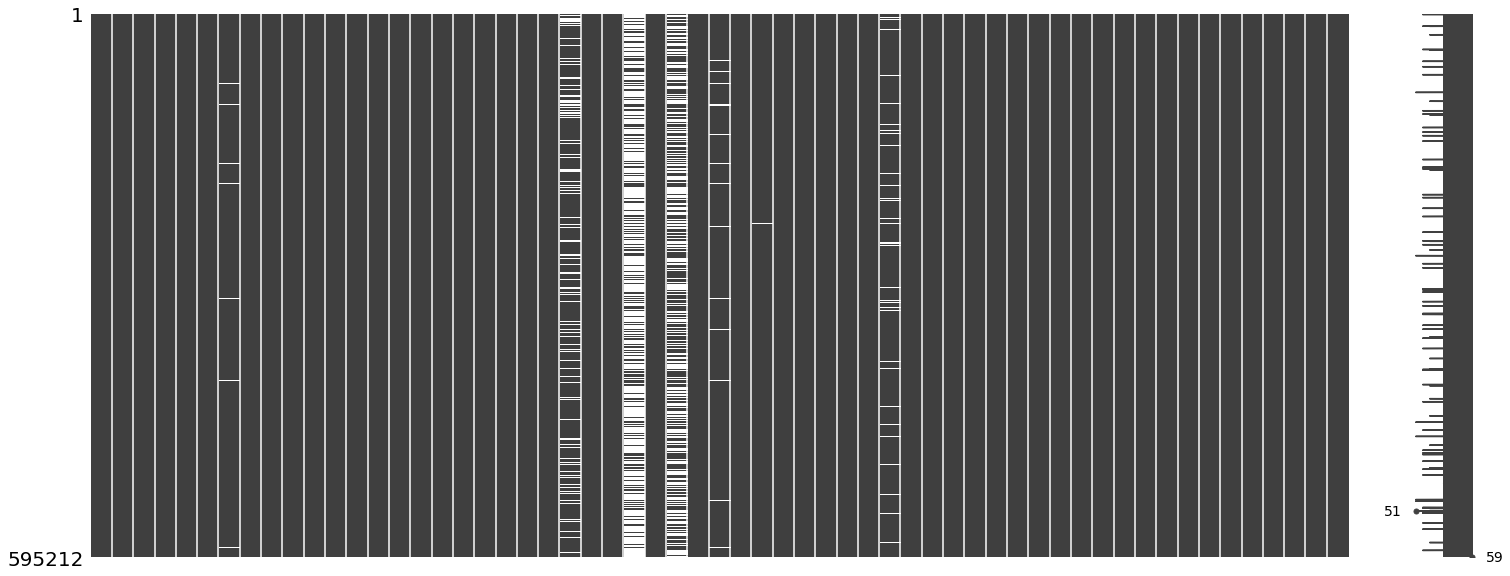

In [0]:
import missingno as msno
msno.matrix(train_copy)            

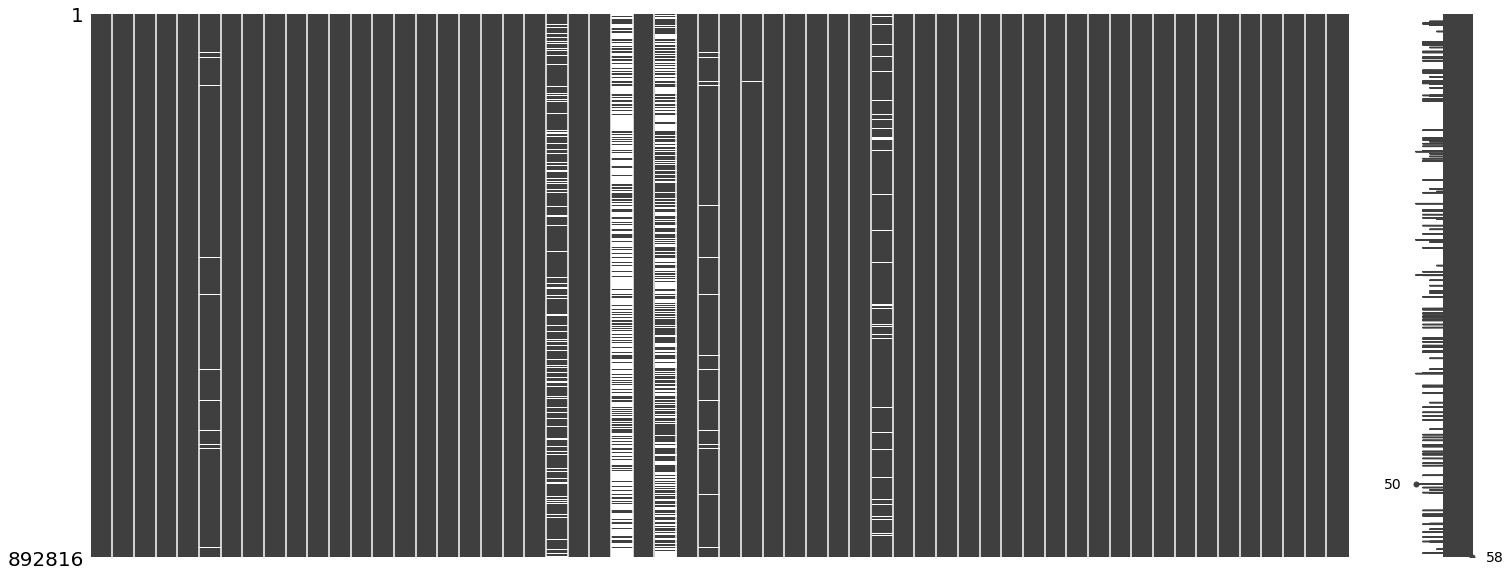

In [0]:
msno.matrix(test_copy)

In [0]:
train[meta_train[meta_train.keep].index].describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000,3.000000,0.374166,0.765811,0.368

In [0]:
test[meta_test[meta_test.keep].index].describe()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.00000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000
mean,1.902371,1.358613,4.413734,0.417361,0.408132,0.393246,0.257191,0.163659,0.185905,0.000373,0.001595,0.009376,0.001039,0.012383,7.296862,0.660591,0.120399,0.154973,0.611057,0.439868,0.551740,8.292038,0.82994,-0.504895,0.725798,-0.158449,6.564297,0.910144,0.832311,1.327911,0.992134,62.284293,2.346606,0.379957,0.813637,0.276431,3.068325,0.449632,0.450453,0.450054,2.371390,1.885328,7.687805,3.009537,9.225854,2.338538,8.443167,5.438478,1.440265,2.875013,7.540367,0.123720,0.627756,0.554660,0.287796,0.349344,0.152428
std,1.986503,0.663002,2.700149,0.493453,1.355068,0.488471,0.437086,0.369966,0.389030,0.019309,0.039905,0.096375,0.032223,0.127251,3.541948,0.473509,0.325428,0.361879,0.287699,0.404678,0.794023,2.508331,0.37570,0.788753,2.154886,0.844566,5.500485,0.347283,0.373590,0.978741,0.091530,33.003714,0.831666,0.058385,0.224779,0.356835,0.729005,0.287213,0.287373,0.287254,1.116953,1.136763,1.333521,1.415155,1.460560,1.248601,2.906361,2.330081,1.200620,1.694072,2.745882,0.329262,0.483403,0.497004,0.452736,0.476763,0.359435
min,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.00000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,0.141421,0.275778,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.524404,7.000000,1.00000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.671234,0.333916,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.721110,7.000000,1.00000,-1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000,3.000000,0.374166,0.766081,0.368782,3.316625,0.400000,0.500000,0.400000,2.000000,2.000000,8.000000,3.0000

## Interval 변수

In [0]:
train_copy[meta_train[(meta_train.dtype == 'float64') & (meta_train.keep)].index].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,487440.000000,595211.000000,595212.000000,552592.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.894047,0.379947,0.813265,0.374691,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.345413,0.058300,0.224588,0.045610,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,0.061237,0.100000,0.250619,0.109545,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.633443,0.316228,0.670867,0.350428,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.801561,0.374166,0.765811,0.373497,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.083974,0.400000,0.906190,0.398121,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


In [0]:
test_copy[meta_test[(meta_test.dtype == 'float64') & (meta_test.keep)].index].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,892816.000000,892816.000000,731132.000000,892816.000000,892816.000000,829011.000000,892816.000000,892816.000000,892816.000000,892816.000000
mean,0.611057,0.439868,0.894895,0.379957,0.813637,0.374672,3.068325,0.449632,0.450453,0.450054
std,0.287699,0.404678,0.345909,0.058385,0.224779,0.045628,0.729005,0.287213,0.287373,0.287254
min,0.000000,0.000000,0.061237,0.141421,0.275778,0.109545,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.633936,0.316228,0.671234,0.350428,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.802730,0.374166,0.766081,0.373497,3.316625,0.400000,0.500000,0.400000
75%,0.900000,0.600000,1.086566,0.400000,0.906132,0.397618,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.423517,1.264911,4.031301,0.636396,3.741657,0.900000,0.900000,0.900000


표를 살펴보면  
`ps_reg_01` : 10을 곱했을 시 정수 가능성 있음  
`ps_reg_02` : 10을 곱했을 시 정수 가능성 있음  
`ps_reg_03` : 결측치 존재  
`ps_car_12` : train에 결측치 존재  
`ps_car_14` : 결측치 존재  
`ps_calc_01` : 10을 곱했을 시 정수 가능성 있음  
`ps_calc_02` : 10을 곱했을 시 정수 가능성 있음  
`ps_calc_03` : 10을 곱했을 시 정수 가능성 있음  


In [0]:
cols = ['ps_reg_01', 'ps_reg_02', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03']
(train[cols] * 10).describe()

,ps_reg_01,ps_reg_02,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,6.109914,4.391844,4.497564,4.495892,4.498488
std,2.876426,4.042643,2.871981,2.868935,2.871530
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,2.000000,2.000000,2.000000
50%,7.000000,3.000000,5.000000,4.000000,5.000000
75%,9.000000,6.000000,7.000000,7.000000,7.000000
max,9.000000,18.000000,9.000000,9.000000,9.000000


In [0]:
cols = ['ps_reg_01', 'ps_reg_02', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03']
(test[cols] * 10).describe()

,ps_reg_01,ps_reg_02,ps_calc_01,ps_calc_02,ps_calc_03
count,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000
mean,6.110566,4.398676,4.496318,4.504527,4.500539
std,2.876989,4.046776,2.872132,2.873733,2.872541
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,2.000000,2.000000,2.000000
50%,7.000000,3.000000,4.000000,5.000000,4.000000
75%,9.000000,6.000000,7.000000,7.000000,7.000000
max,9.000000,18.000000,9.000000,9.000000,9.000000


In [0]:
for c in cols:
  unique_value = (train[c]*10).unique()
  print(c, unique_value)

ps_reg_01 [7. 8. 0. 9. 6. 5. 4. 3. 2. 1.]
ps_reg_02 [ 2.  4.  0.  6. 18.  1.  7. 14.  9.  3.  5.  8. 10. 13. 16. 15. 12. 11.
 17.]
ps_calc_01 [6. 3. 5. 4. 7. 2. 1. 9. 8. 0.]
ps_calc_02 [5. 1. 7. 9. 6. 8. 4. 0. 3. 2.]
ps_calc_03 [2. 3. 1. 0. 4. 5. 6. 8. 9. 7.]


In [0]:
for c in cols:
  unique_value = (test[c]*10).unique()
  print(c, unique_value)

ps_reg_01 [5. 9. 4. 1. 6. 2. 3. 7. 8. 0.]
ps_reg_02 [ 3.  5.  0.  2.  4.  1. 11. 10. 17.  7.  8. 13. 16.  6.  9. 12. 14. 15.
 18.]
ps_calc_01 [1. 4. 6. 9. 7. 8. 0. 2. 3. 5.]
ps_calc_02 [8. 5. 6. 9. 3. 4. 1. 7. 2. 0.]
ps_calc_03 [6. 4. 5. 8. 0. 7. 3. 9. 1. 2.]


위의 변수들은 10을 곱하면 정수로 나타남.

In [0]:
Float_cols = meta_train[(meta_train.dtype == 'float64') & (meta_train.keep)].index
Float_cols = [c for c in Float_cols if c not in cols]

In [0]:
for c in Float_cols:
  values = pow(train_copy[c] * 10, 1/2)
  print(c, values.head())

ps_reg_03 0    2.679683
1    2.767811
2         NaN
3    2.410285
4    2.899584
Name: ps_reg_03, dtype: float64
ps_car_12 0    2.000000
1    1.778279
2    1.778279
3    1.934336
4    1.777835
Name: ps_car_12, dtype: float64
ps_car_13 0    2.972674
1    2.487602
2    2.532954
3    2.330126
4    2.378721
Name: ps_car_13, dtype: float64
ps_car_14 0    1.925643
1    1.971588
2    1.863532
3    1.717433
4    1.910766
Name: ps_car_14, dtype: float64
ps_car_15 0    6.004624
1    4.949232
2    5.759014
3    4.472136
4    4.472136
Name: ps_car_15, dtype: float64


In [0]:
for c in Float_cols:
  values = pow(train_copy[c], 2)
  print(c, values.head())

ps_reg_03 0    0.515625
1    0.586875
2         NaN
3    0.337500
4    0.706875
Name: ps_reg_03, dtype: float64
ps_car_12 0    0.1600
1    0.1000
2    0.1000
3    0.1400
4    0.0999
Name: ps_car_12, dtype: float64
ps_car_13 0    0.780888
1    0.382934
2    0.411632
3    0.294793
4    0.320165
Name: ps_car_13, dtype: float64
ps_car_14 0    0.1375
1    0.1511
2    0.1206
3    0.0870
4    0.1333
Name: ps_car_14, dtype: float64
ps_car_15 0    13.0
1     6.0
2    11.0
3     4.0
4     4.0
Name: ps_car_15, dtype: float64


In [0]:
Float_cols = meta_test[(meta_test.dtype == 'float64') & (meta_test.keep)].index
Float_cols = [c for c in Float_cols if c not in cols]

In [0]:
for c in Float_cols:
  values = pow(test_copy[c] * 10, 1/2)
  print(c, values.head())

ps_reg_03 0    2.470481
1    2.777341
2    3.026837
3         NaN
4    2.859670
Name: ps_reg_03, dtype: float64
ps_car_12 0    1.778279
1    1.778279
2    2.000000
3    1.934336
4    1.934336
Name: ps_car_12, dtype: float64
ps_car_13 0    2.587579
1    2.462357
2    2.993725
3    2.553645
4    2.851165
Name: ps_car_13, dtype: float64
ps_car_14 0    1.876530
1    1.892959
2    1.996239
3    1.953061
4    1.962390
Name: ps_car_14, dtype: float64
ps_car_15 0    5.885662
1    5.318296
2    5.759014
3    4.949232
4    5.759014
Name: ps_car_15, dtype: float64


In [0]:
for c in Float_cols:
  values = pow(test_copy[c] * 10, 2)
  print(c, values.head())

ps_reg_03 0    37.2500
1    59.5000
2    83.9375
3        NaN
4    66.8750
Name: ps_reg_03, dtype: float64
ps_car_12 0    10.0
1    10.0
2    16.0
3    14.0
4    14.0
Name: ps_car_12, dtype: float64
ps_car_13 0    44.830579
1    36.762397
2    80.324380
3    42.524793
4    66.082975
Name: ps_car_13, dtype: float64
ps_car_14 0    12.40
1    12.84
2    15.88
3    14.55
4    14.83
Name: ps_car_14, dtype: float64
ps_car_15 0    1200.0
1     800.0
2    1100.0
3     600.0
4    1100.0
Name: ps_car_15, dtype: float64


`ps_car_12` : 제곱을 취하고 100을 곱했을 때 정수 값의 형태를 보임   
 `ps_car_15` : 제곱을 취했을 때 정수 값의 형태를 보임

In [0]:
(pow(train['ps_car_12'], 2) * 100).round(1).unique()

array([ 16. ,  10. ,  14. ,  19.9,  20. ,  30. ,   9.9,  18. ,  28. ,
        16.7,  15. ,  17.9,  13. ,  15.8,  27. ,  17.5,  24. ,  17.8,
        15.9,  32. ,  42. ,  35. ,  23. ,  25. ,  13.6,  19. ,  33. ,
        38. ,  19.8,  36. ,  29.7, 160. ,  22.6,  24.8,  22. ,  44. ,
        11. ,  26.6,  48. ,  13.9,  67. ,  17. ,  15.6,  24.5,  29.8,
         2. ,  47. ,  28.4,  37. ,  40. ,  37.8,  59. ,  21.5,  43. ,
        21.7,  26.1,  23.5,  49.7,  24.9,  27.8,  27.9,  46. ,  19.7,
        29.9,  12.4,  39. ,  36.6,  62. ,  50. ,  48.9,  22.9,  52.3,
        22.5,  37.9,  41. ,  52. ,  39.2,  39.1,  57. ,  21.6,  26. ,
        29.6,  34. ,   8. ,  55. ,  17.6,  41.7,  14.9,   3. ,  39.6,
        59.7,  49.1,   9.5,  29. ,  40.9,  24.6,  18.3, 100. ,  33.8,
        61. ,  31.6,  15.7,  28.9,  27.7,  39.8,  13.7,  45. ,   1. ,
         2.2,  12. ])

In [0]:
pow(train['ps_car_15'], 2).round(2).unique()

array([13.,  6., 11.,  4.,  9., 10.,  8., 14.,  7.,  0.,  2., 12.,  3.,
        5.,  1.])

In [0]:
(pow(test['ps_car_12'], 2) * 100).round(1).unique()

array([ 10. ,  16. ,  14. ,  20. ,  17.8,  18. ,  25. ,  36. ,  15.9,
        37. ,  24.9,  16.7,  24. ,  15. ,  19.8,  28. ,  13. ,  32. ,
         9.9,  30. ,  33. ,  23. ,  27. ,  35. ,  19. ,  38. ,  24.8,
        17.5,  17. ,  15.8,  19.9,  29.9,  39. ,  17.9,  13.6,  22. ,
        29.6,  22.6,  26. ,  11. ,   3. ,  15.6,   2. ,  41.7,  24.5,
        40. ,  37.9,  41. ,  12.4,  26.6,  27.8,  42. , 160. ,  13.9,
        29.8,  67. ,  43. ,  40.9,  27.9,  55. ,  31.9,  26.1,  50. ,
         9.5,  27.7,  23.5,  59. ,  39.1,  18.3,  44. ,  46. ,  48. ,
        28.4,  62. ,   2.2,  21.5,  19.7,  29. ,  29.7,  21.6,  34. ,
        36.6,  24.4,  37.8,  52. ,  57. ,  39.8,  22.9,  21.7,  32.5,
        49.7,  17.6,  29.2,  14.9,  26.7,  45. ,  17.7,  49.1,  39.2,
        42.7,  33.8,  61. ,  23.2,  28.9,  47. ,  52.3,  18.4,  39.6,
        23.7,  53. ,  52.1,  45.1,  13.3,  12. ,  22.1,  23.9,  21.8,
        24.6,  22.5,   8.5,  66. ,  60. ,  59.7])

In [0]:
pow(test['ps_car_15'], 2).round(2).unique()

array([12.,  8., 11.,  6., 13.,  7., 14., 10.,  2.,  9.,  0.,  3.,  4.,
        5.,  1.])

`ps_car_15` 변수는 루트 값을 취함

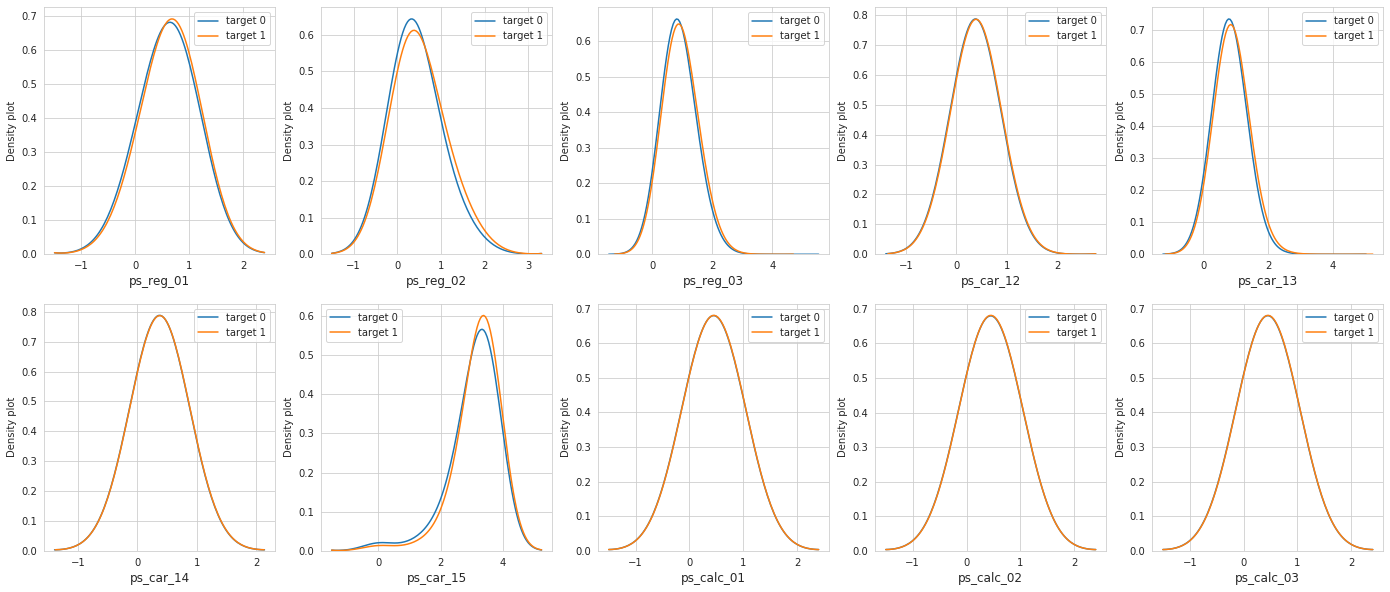

In [47]:
y_0 = train_copy[train_copy.target == 0]
y_1 = train_copy[train_copy.target == 1]
i = 0

var = meta_train[meta_train.level == 'interval'].index

f, ax = plt.subplots(2,  5, figsize = (24, 10))

for c in var:
  i += 1
  plt.subplot(2, 5, i)
  sns.kdeplot(y_0[c], bw = 0.5, label = 'target 0')
  sns.kdeplot(y_1[c], bw = 0.5, label = 'target 1')
  plt.ylabel('Density plot')
  plt.xlabel(c, fontsize = 12)

`target` 개수는 차이나지만  
분포는 거의 동일함.

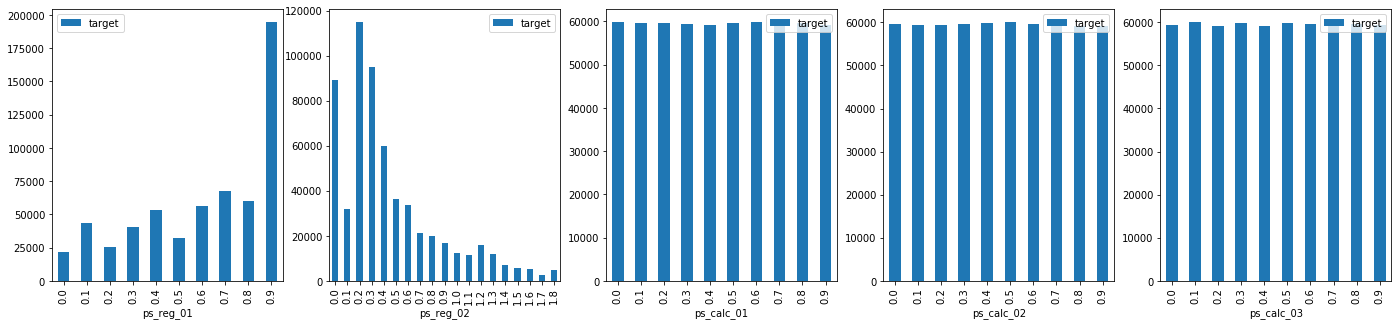

In [0]:
f, ax = plt.subplots(1, 5, figsize = (24, 5))
i = 0

for c in cols:
  train_copy[[c, 'target']].groupby(c).count().plot(kind = 'bar', ax = ax[i])
  i += 1

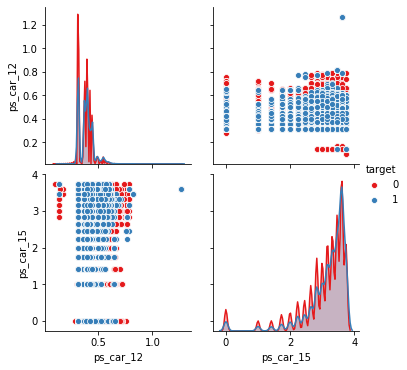

In [0]:
var = ['ps_car_12', 'ps_car_15', 'target']
df_var = train_copy[var]

sns.pairplot(df_var,
             hue = 'target',
             palette = 'Set1',
             diag_kind = 'kde')

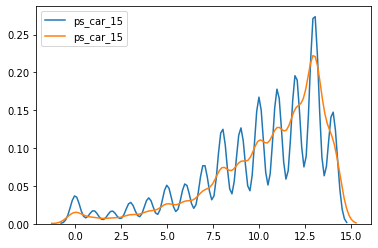

In [0]:
sns.kdeplot(pow(y_0['ps_car_15'], 2))
sns.kdeplot(pow(y_1['ps_car_15'], 2))

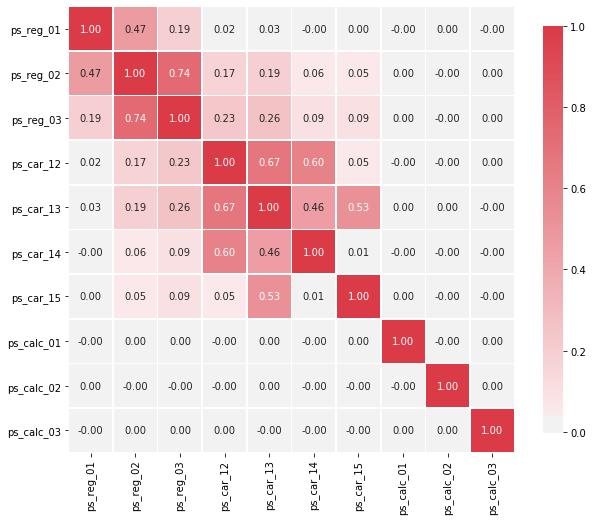

In [0]:
def corr_heatmap(df, var):
  cor = df[var].corr()

  cmap = sns.diverging_palette(50, 10, as_cmap = True)

  f, ax = plt.subplots(figsize = (10, 10))
  sns.heatmap(cor,
              cmap = cmap,
              vmax = 1.0,
              center = 0,
              fmt = '.2f',
              square = True,
              linewidths = 0.5,
              annot = True, 
              cbar_kws = {'shrink' : 0.75})

var = meta_train[(meta_train.keep) & (meta_train.level == 'interval')].index
corr_heatmap(train_copy, var)

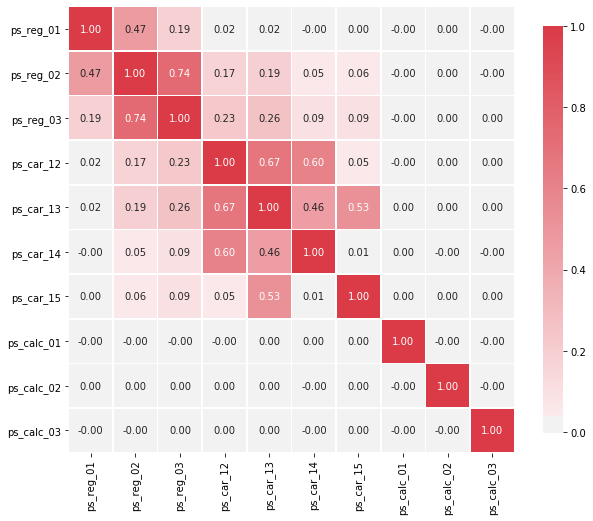

In [0]:
var = meta_test[(meta_test.keep) & (meta_test.level == 'interval')].index
corr_heatmap(test_copy, var)

몇몇 변수들 간 상관관계가 존재한다.  

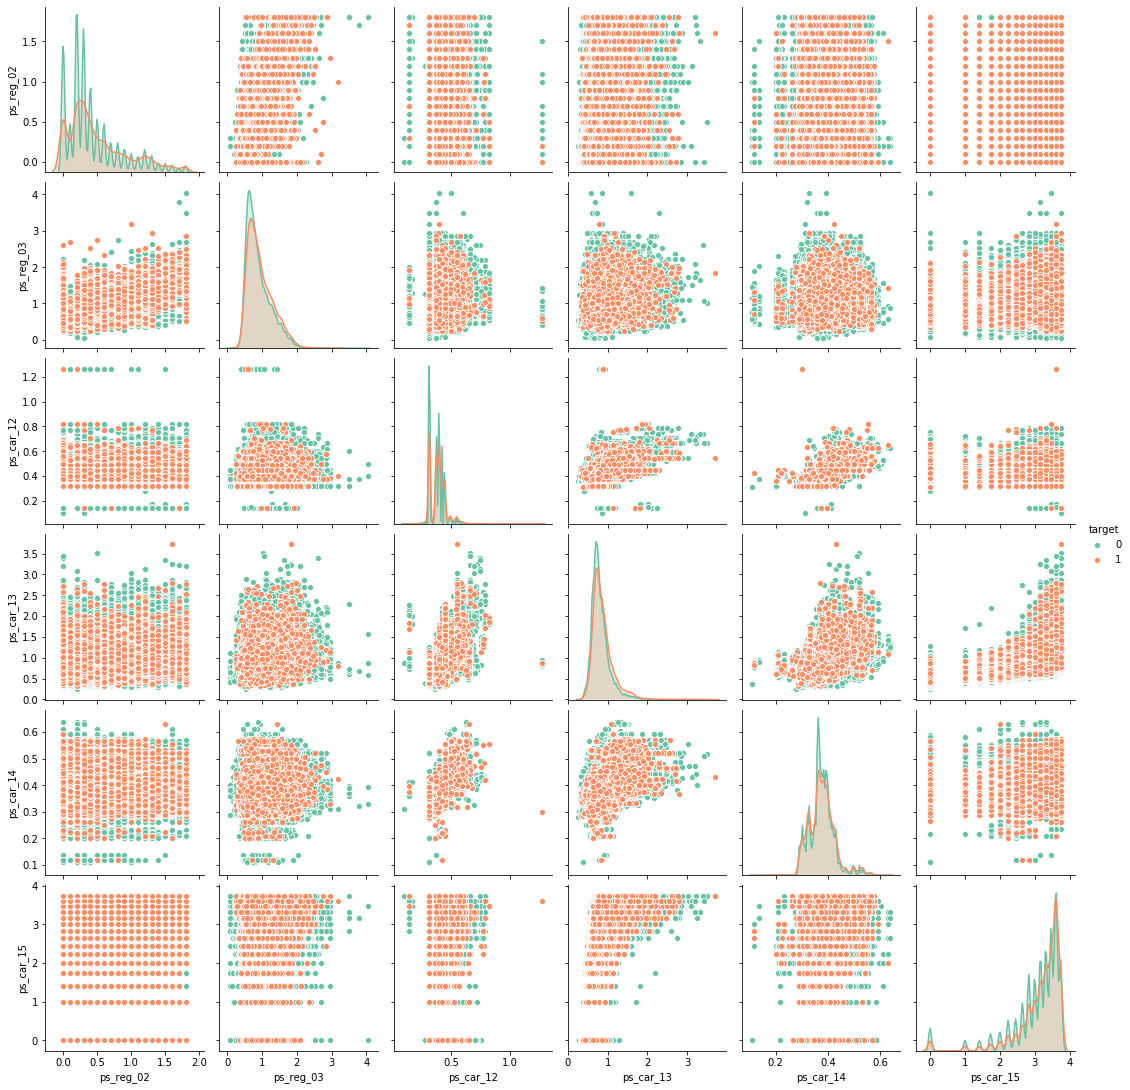

In [0]:
var = ['ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'target']
sns.pairplot(train_copy[var],
             hue = 'target',
             palette = 'Set2',
             diag_kind = 'kde')

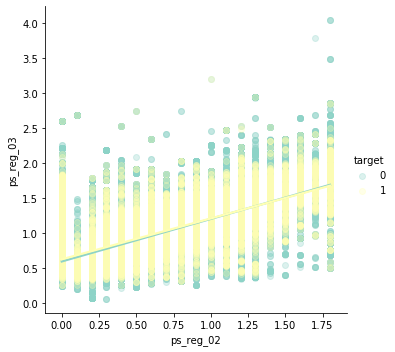

In [0]:
sns.lmplot(x = 'ps_reg_02',
           y = 'ps_reg_03',
           data = train_copy,
           hue = 'target',
           palette = 'Set3',
           scatter_kws = {'alpha' : 0.3})

In [12]:
reg_02_03 = train_copy[(train_copy['ps_reg_02'] >= 1.5) & (train_copy['ps_reg_03'] >= 3.0)].index
reg_02_03

Int64Index([73060, 83159, 140528, 253664, 333985, 349765, 392475, 428100], dtype='int64')

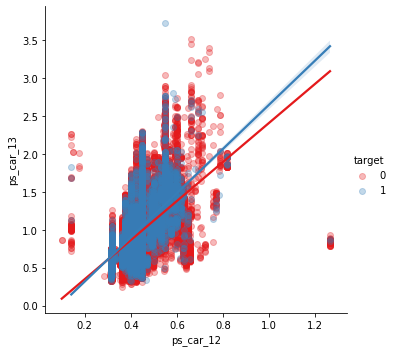

In [0]:
sns.lmplot(x = 'ps_car_12',
           y = 'ps_car_13',
           data = train_copy,
           hue = 'target',
           palette = 'Set1',
           scatter_kws = {'alpha' : 0.3})

In [11]:
car_12_13 = train_copy[(train_copy['ps_car_12'] >= 1.2) & (train_copy['ps_car_13'] <= 1.5)].index
car_12_13

Int64Index([   553,   5863,  26865,  39378,  53293,  74302,  91758,  93185,
            100538, 144628, 154841, 168948, 191673, 192950, 196509, 231777,
            236911, 241206, 253122, 255728, 266860, 278704, 285908, 302615,
            333672, 361166, 369054, 410456, 414090, 415398, 483672, 485702,
            493946, 511923, 515735, 562140, 569092, 575466],
           dtype='int64')

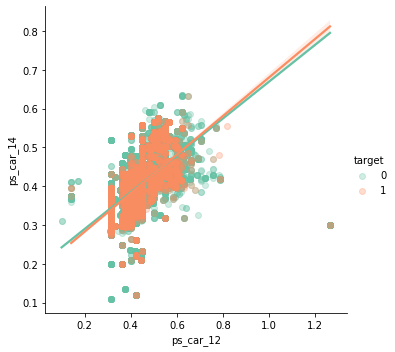

In [0]:
sns.lmplot(x = 'ps_car_12',
           y = 'ps_car_14',
           data = train_copy,
           hue = 'target',
           palette = 'Set2',
           scatter_kws = {'alpha' : 0.3})

In [13]:
car_12_14 = train_copy[(train_copy['ps_car_12'] >= 1.2) & (train_copy['ps_car_14'] <= 0.4)].index
car_12_14

Int64Index([   553,   5863,  26865,  39378,  53293,  74302,  91758,  93185,
            100538, 144628, 154841, 168948, 191673, 192950, 196509, 231777,
            236911, 241206, 253122, 255728, 266860, 278704, 285908, 302615,
            333672, 361166, 369054, 410456, 414090, 415398, 483672, 485702,
            493946, 511923, 515735, 562140, 569092, 575466],
           dtype='int64')

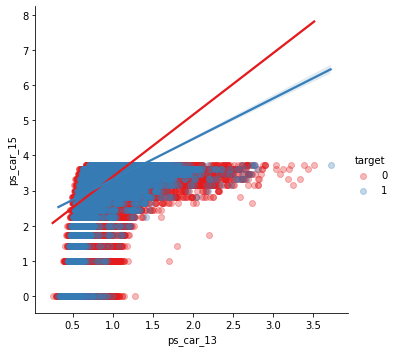

In [0]:
sns.lmplot(x = 'ps_car_13',
           y = 'ps_car_15',
           data = train_copy,
           hue = 'target',
           palette = 'Set1',
           scatter_kws = {'alpha' : 0.3})

In [14]:
car_13_15 = train_copy[(train_copy['ps_car_13'] >= 3.5) & (train_copy['ps_car_15'] <= 4)].index
car_13_15

Int64Index([117800, 149161], dtype='int64')

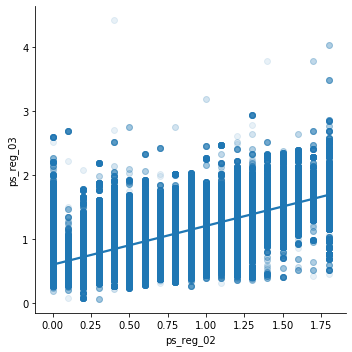

In [0]:
sns.lmplot(x = 'ps_reg_02',
           y = 'ps_reg_03',
           data = test_copy,
           palette = 'Set1',
           scatter_kws = {'alpha' : 0.1})

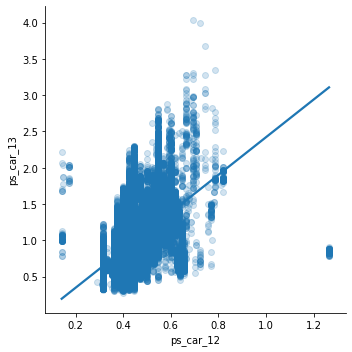

In [0]:
sns.lmplot(x = 'ps_car_12',
           y = 'ps_car_13',
           data = test_copy,
           palette = 'Set1',
           scatter_kws = {'alpha' : 0.2})

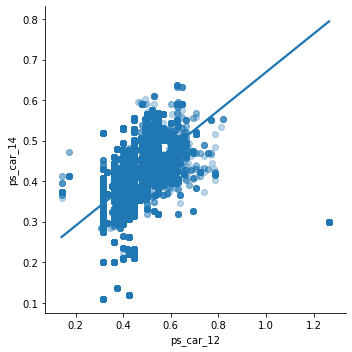

In [0]:
sns.lmplot(x = 'ps_car_12',
           y = 'ps_car_14',
           data = test_copy,
           palette = 'Set1',
           scatter_kws = {'alpha' : 0.3})

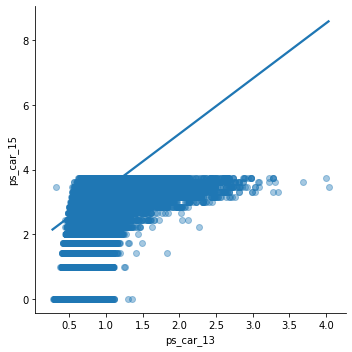

In [0]:
sns.lmplot(x = 'ps_car_13',
           y = 'ps_car_15',
           data = test_copy,
           palette = 'Set1',
           scatter_kws = {'alpha' : 0.4})

## Binary 변수

In [0]:
var = meta_train[(meta_train.keep) & (meta_train.level == 'binary')].index

In [17]:
train_copy[var].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
var = meta_test[(meta_test.keep) & (meta_test.level == 'binary')].index

In [29]:
test_copy[var].describe()

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000
mean,0.393246,0.257191,0.163659,0.185905,0.000373,0.001595,0.009376,0.001039,0.660591,0.120399,0.154973,0.123720,0.627756,0.554660,0.287796,0.349344,0.152428
std,0.488471,0.437086,0.369966,0.389030,0.019309,0.039905,0.096375,0.032223,0.473509,0.325428,0.361879,0.329262,0.483403,0.497004,0.452736,0.476763,0.359435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


`binary`변수는 0과 1의 값이며  
평균값이 1%도 안되는 변수들이 존재한다.  

0과 1의 값이 심하게 불균형 돼있다.

In [0]:
def percent_plot(var, df):
  var = [v for v in var if not(v == 'target')]
  zero_list = []
  one_list = []
  for v in var:
    zero = ((df[v] == 0).sum() / df.shape[0]) * 100
    one = ((df[v] == 1).sum() / df.shape[0]) * 100
    zero_list.append(zero)
    one_list.append(one)
  
  plt.figure()
  fig, ax = plt.subplots(figsize = (8 ,8))

  p1 = sns.barplot(ax = ax, x = bin_col, y = zero_list, color = "blue")
  p2 = sns.barplot(ax = ax, x = bin_col, y = one_list, bottom= zero_list, color = "red")
  plt.ylabel('Percent of zero/one [%]', fontsize = 12)
  plt.xlabel('Binary features', fontsize = 12)
  locs, labels = plt.xticks()
  plt.setp(labels, rotation = 90)
  plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
  plt.legend((p1, p2), ('Zero', 'One'))

In [0]:
var = meta_train[(meta_train.keep) & (meta_train.level == 'binary')].index

<Figure size 432x288 with 0 Axes>

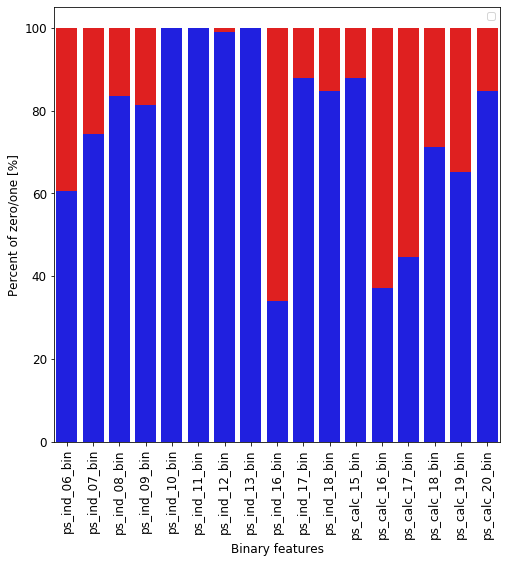

In [25]:
percent_plot(var, train_copy)

In [0]:
var = meta_test[(meta_test.keep) & (meta_test.level == 'binary')].index

<Figure size 432x288 with 0 Axes>

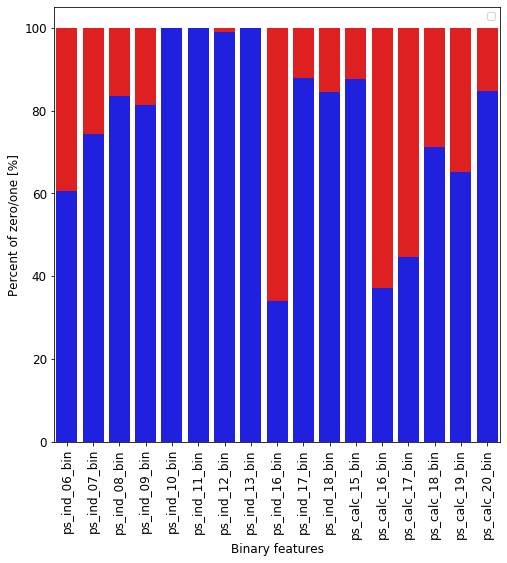

In [33]:
percent_plot(var, test_copy)

<Figure size 432x288 with 0 Axes>

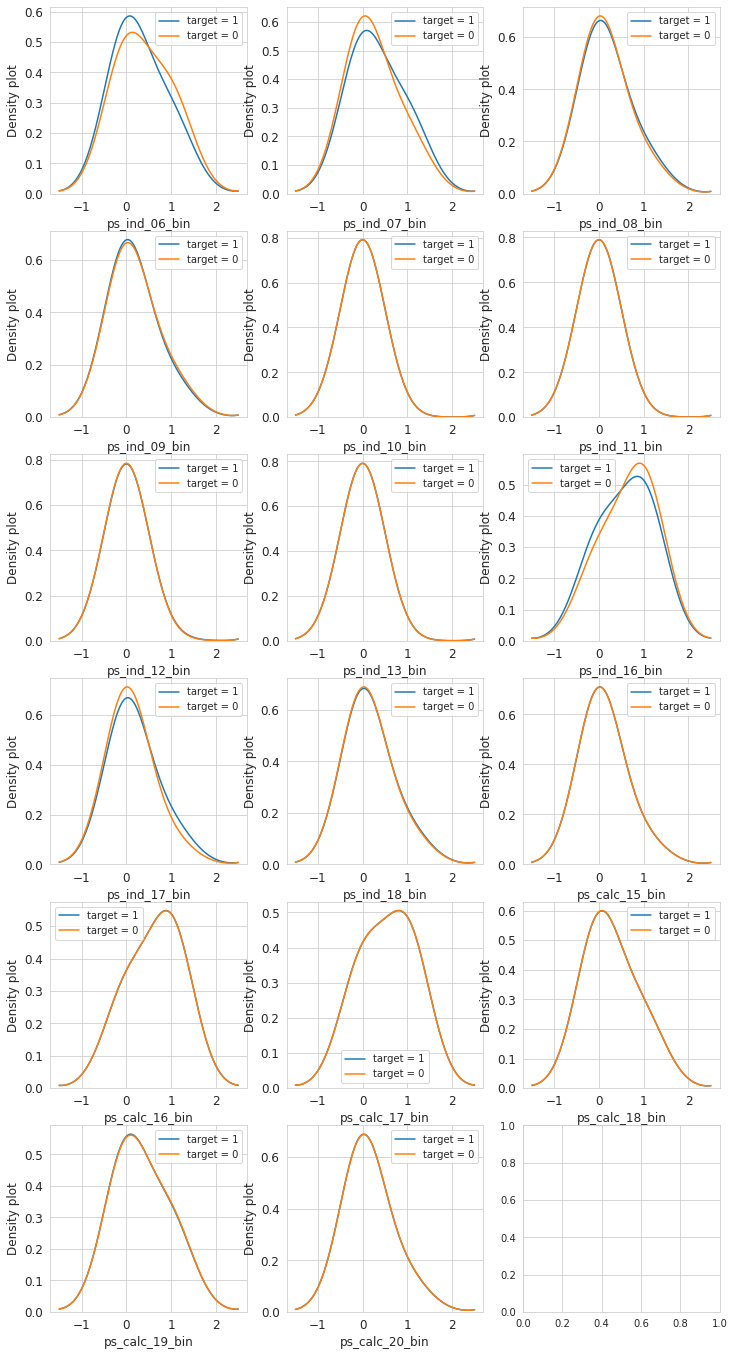

In [35]:
var = meta_train[(meta_train.level == 'binary') & (meta_train.keep)].index
var = [col for col in train_copy.columns if 'bin' in col]

i = 0
t1 = train_copy.loc[train_copy['target'] != 0]
t0 = train_copy.loc[train_copy['target'] == 0]

sns.set_style('whitegrid')
plt.figure()
f, ax = plt.subplots(6, 3, figsize=(12, 24))

for v in var:
    i += 1
    plt.subplot(6, 3, i)
    sns.kdeplot(t1[v], bw=0.5, label = "target = 1")
    sns.kdeplot(t0[v], bw=0.5, label = "target = 0")
    plt.ylabel('Density plot', fontsize = 12)
    plt.xlabel(v, fontsize = 12)
    locs, labels = plt.xticks()
    plt.tick_params(axis = 'both', which = 'major', labelsize = 12)

## Nominal 변수

In [0]:
var = meta_train[(meta_train.keep) & (meta_train.level == 'nominal')].index

In [39]:
train_copy[var].describe()

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
count,594996.000000,595129.000000,589403.000000,595105.000000,595207.000000,183981.000000,595212.000000,328661.000000,595212.000000,583723.000000,595212.000000,594643.000000,595212.000000,595212.000000
mean,1.359799,0.416992,0.419038,8.297605,0.829947,0.601741,0.725192,0.525365,6.555340,0.947621,0.832080,1.331118,0.992136,62.215674
std,0.663193,0.493062,1.350023,2.505396,0.375680,0.489541,2.153463,0.499357,5.501445,0.222791,0.373796,0.976559,0.091619,33.012455
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000
50%,1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000
75%,2.000000,1.000000,0.000000,11.000000,1.000000,1.000000,0.000000,1.000000,11.000000,1.000000,1.000000,2.000000,1.000000,93.000000
max,4.000000,1.000000,6.000000,11.000000,1.000000,1.000000,9.000000,1.000000,17.000000,1.000000,1.000000,4.000000,2.000000,104.000000


In [0]:
var = meta_test[(meta_test.keep) & (meta_test.level == 'nominal')].index

In [41]:
test_copy[var].describe()

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
count,892509.000000,892671.000000,884106.000000,892656.000000,892811.000000,275905.000000,892816.000000,492457.000000,892816.000000,875485.000000,892816.000000,891939.000000,892816.000000,892816.000000
mean,1.359424,0.417592,0.422005,8.293703,0.829951,0.602138,0.725798,0.525717,6.564297,0.947957,0.832311,1.330200,0.992134,62.284293
std,0.661671,0.493162,1.354464,2.505469,0.375676,0.489457,2.154886,0.499339,5.500485,0.222114,0.373590,0.976495,0.091530,33.003714
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000
50%,1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000
75%,2.000000,1.000000,0.000000,11.000000,1.000000,1.000000,0.000000,1.000000,11.000000,1.000000,1.000000,2.000000,1.000000,94.000000
max,4.000000,1.000000,6.000000,11.000000,1.000000,1.000000,9.000000,1.000000,17.000000,1.000000,1.000000,4.000000,2.000000,104.000000


`ps_ind_02_cat` : 결측치 존재  
`ps_ind_04_cat` : 결측치 존재  
`ps_ind_05_cat` : 결측치 존재, 대부분 값이 0  
`ps_car_01_cat` : 결측치 존재  
`ps_car_02_cat` : 결측치 존재, 대부분 값이 1  
`ps_car_03_cat` : 결측치 존재  
`ps_car_04_cat` : 대부분 값이 0  
`ps_car_05_cat` : 결측치 존재  
`ps_car_07_cat` : 결측치 존재  
`ps_car_09_cat` : 결측치 존재  
`ps_car_11_cat` : 1부터 104까지의 값을 가짐

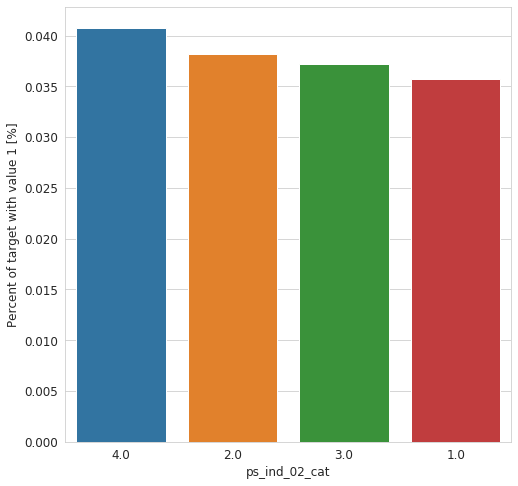

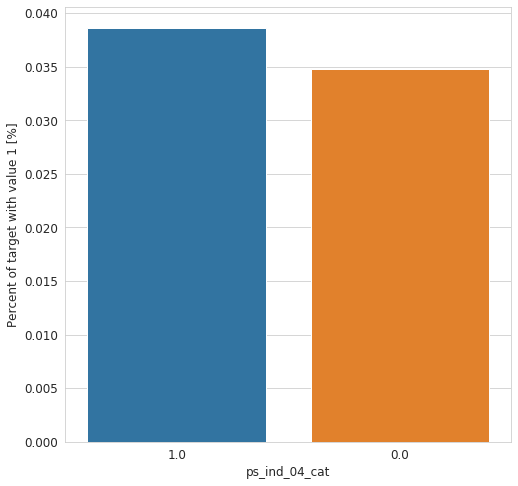

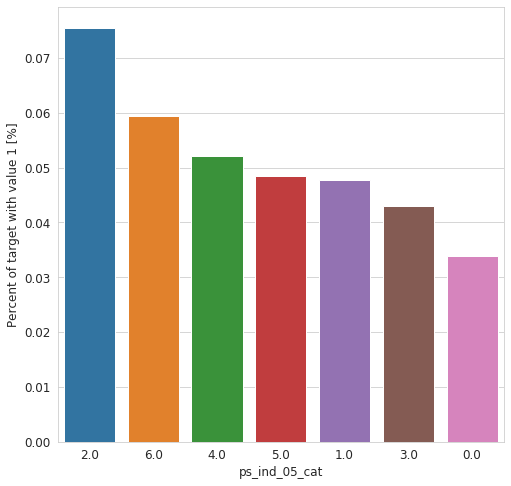

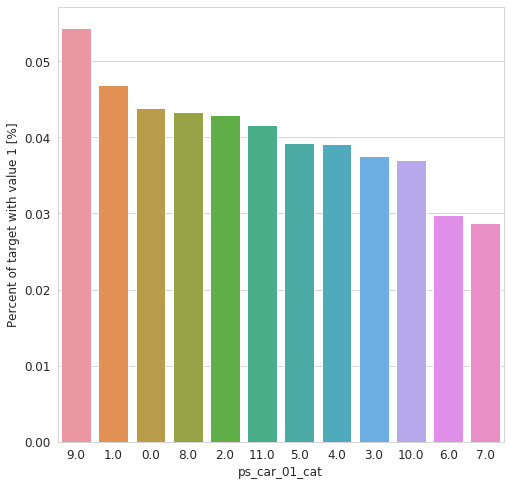

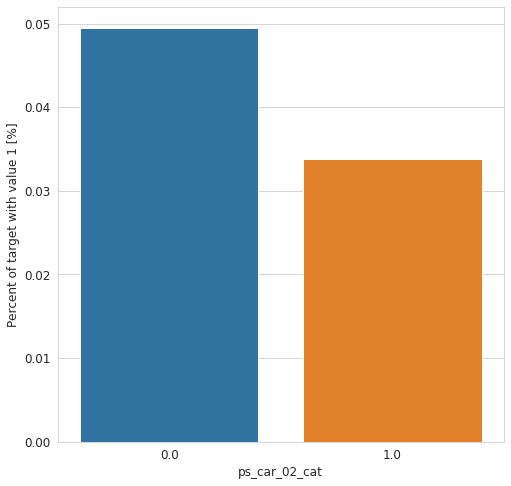

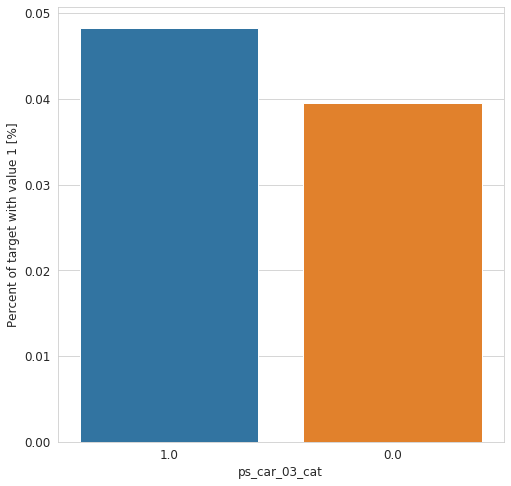

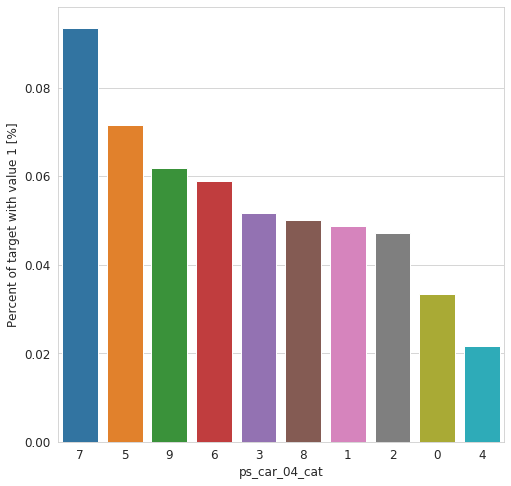

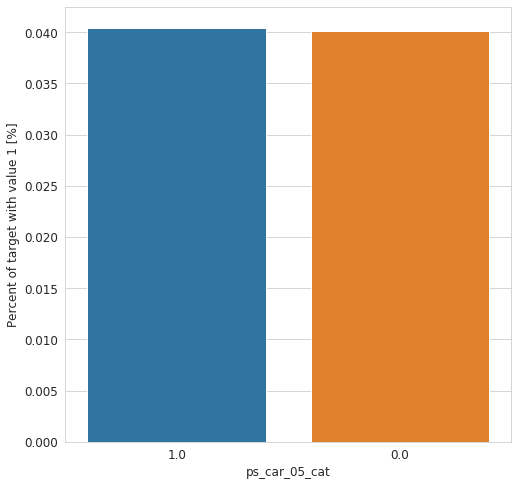

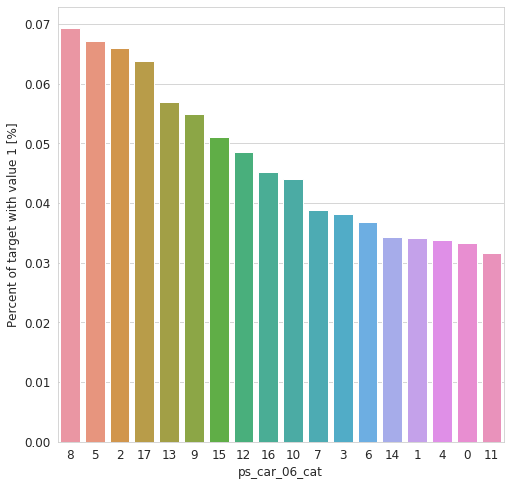

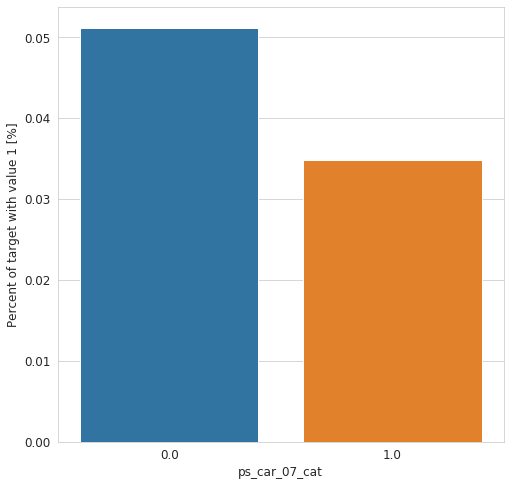

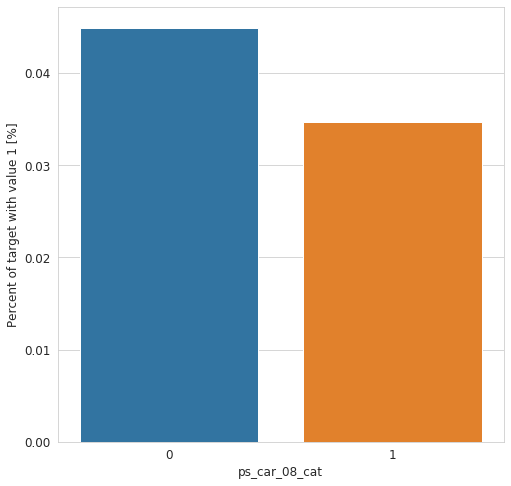

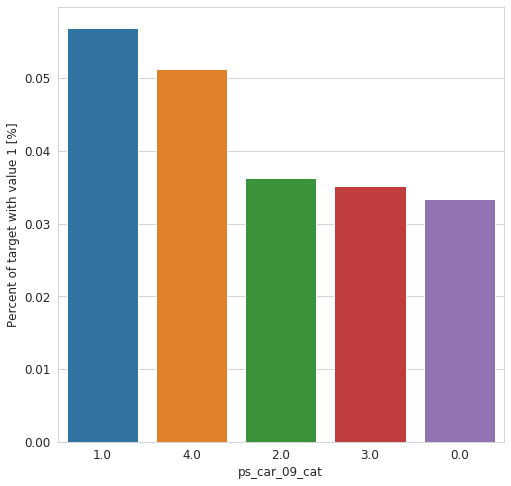

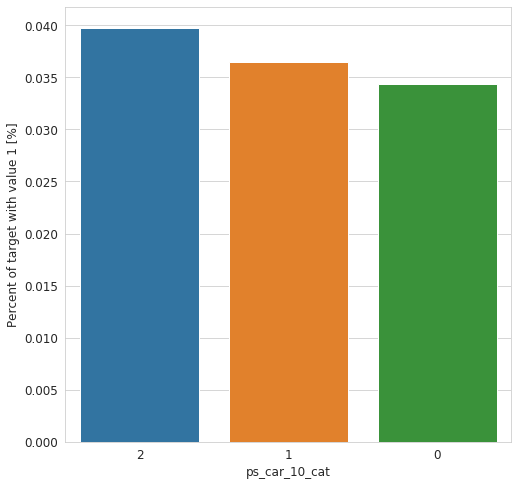

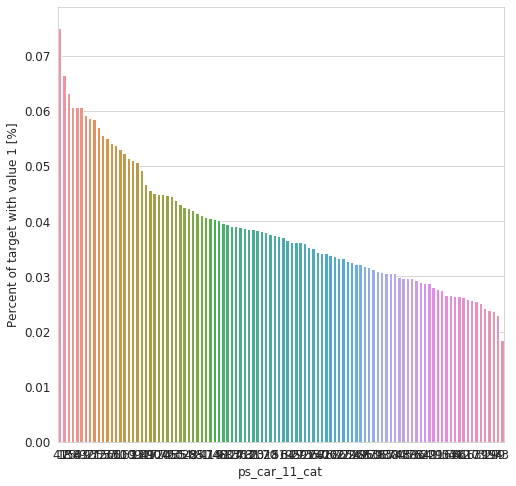

In [49]:
var = meta_train[(meta_train.level == 'nominal') & (meta_train.keep)].index

for v in var:
  f, ax = plt.subplots(figsize = (8, 8))
  cat_perc = train_copy[[v, 'target']].groupby(v, as_index = False).mean()
  cat_perc.sort_values(by = 'target', ascending = False, inplace = True)

  sns.barplot(ax = ax, x = v, y = 'target', data = cat_perc, order = cat_perc[v])
  plt.ylabel('Percent of target with value 1 [%]', fontsize = 12)
  plt.xlabel(v, fontsize = 12)
  plt.tick_params(axis = 'both', which = 'major', labelsize = 12)

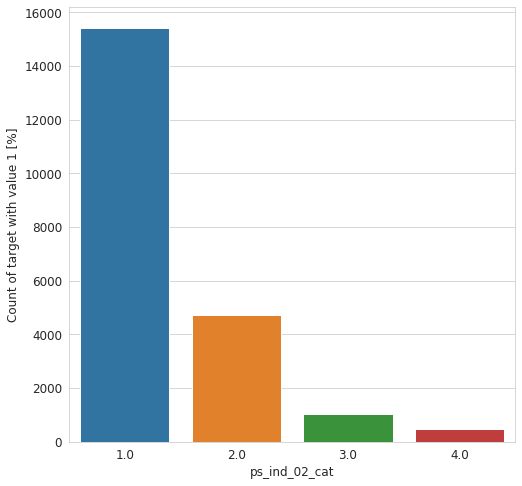

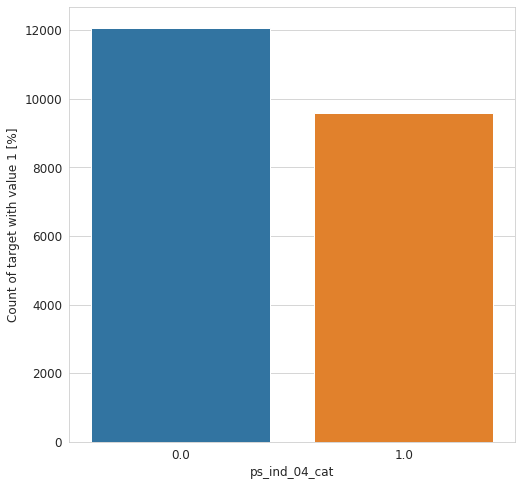

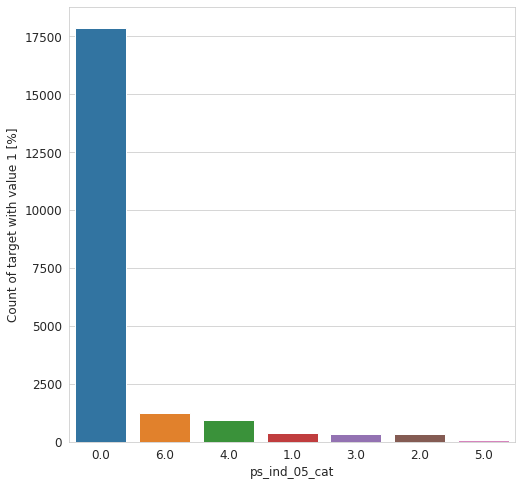

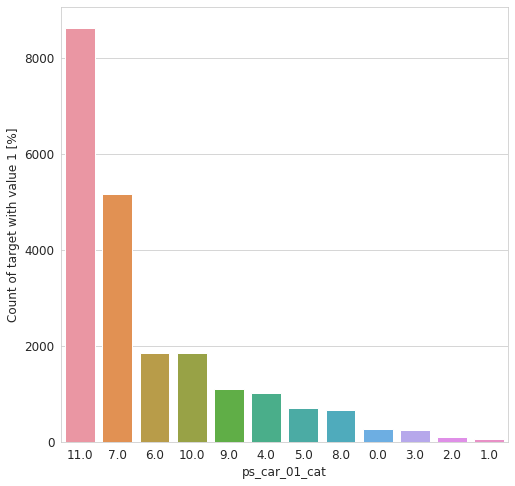

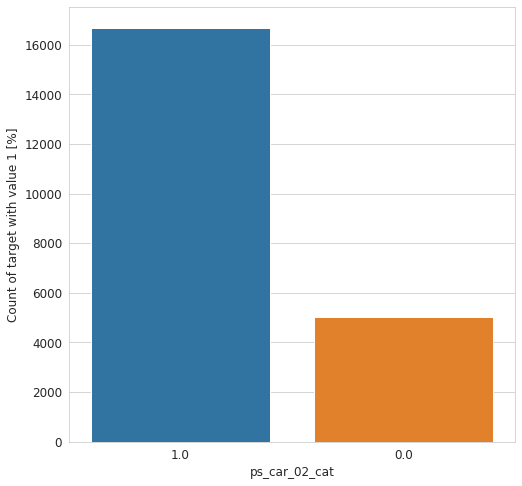

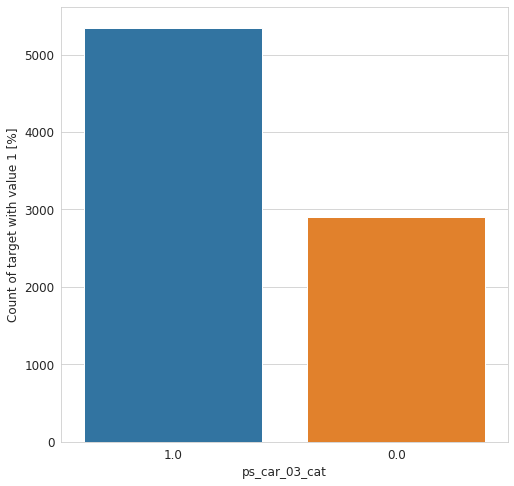

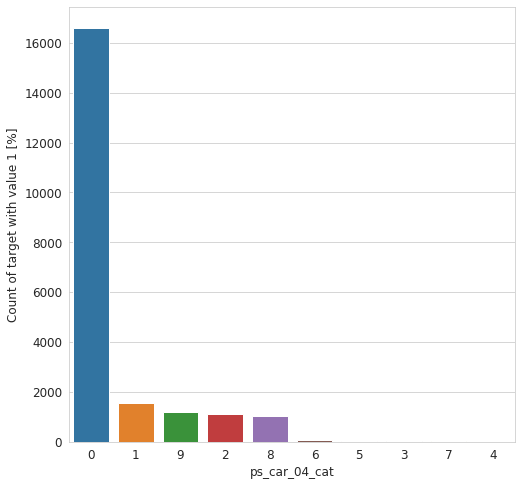

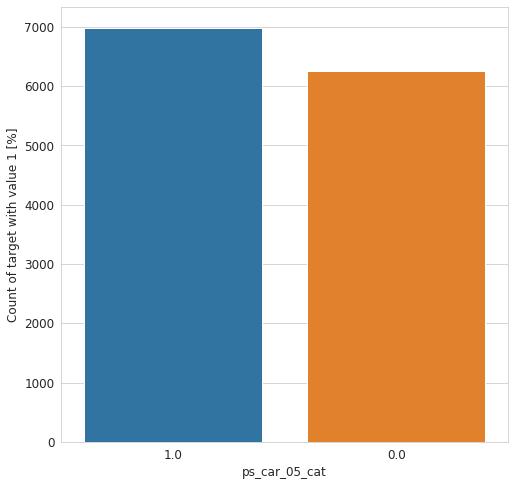

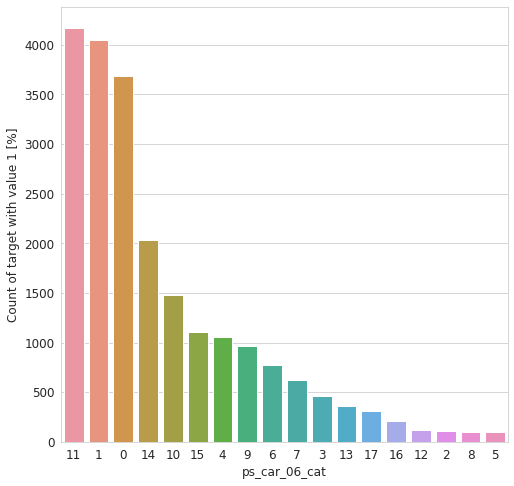

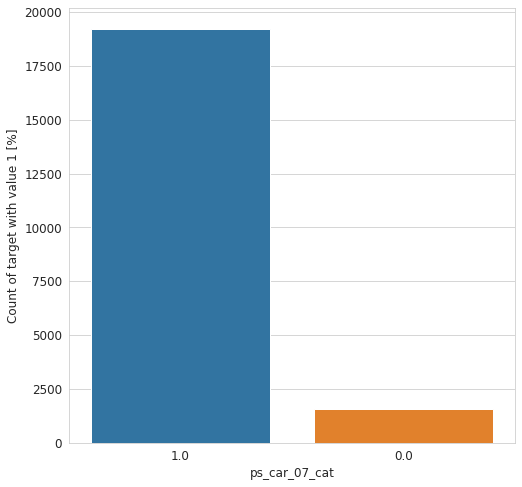

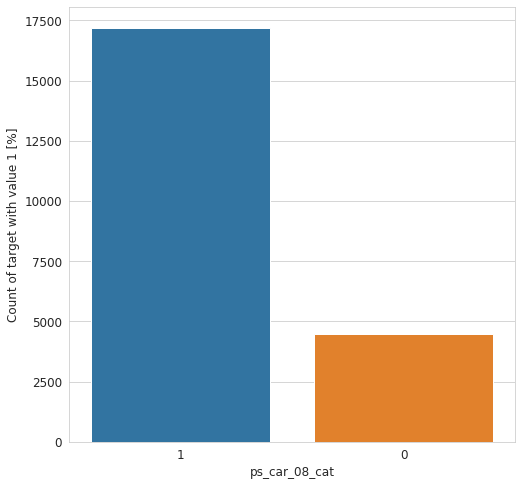

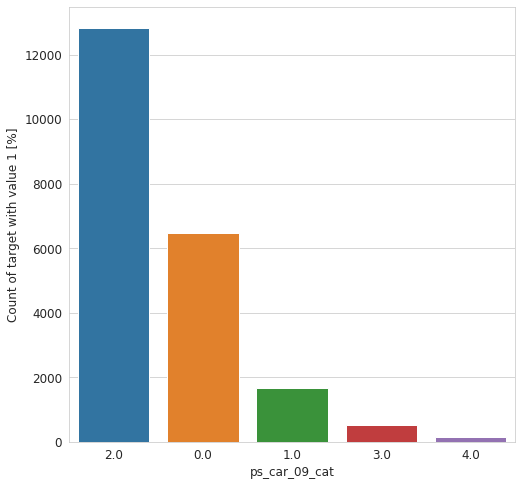

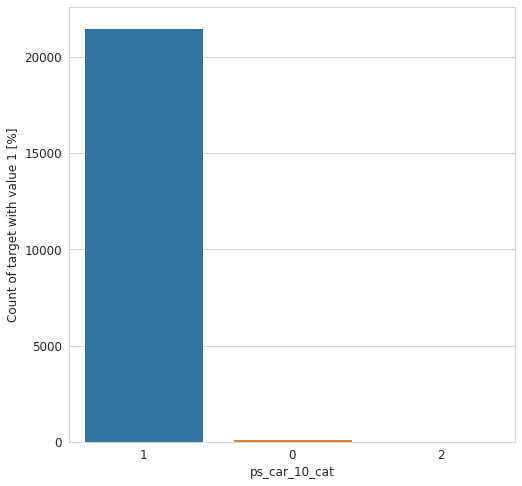

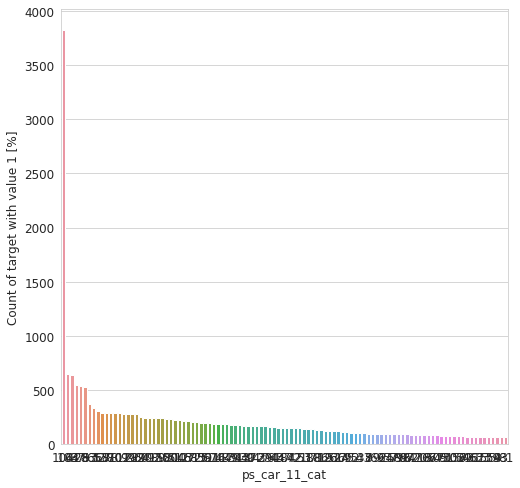

In [65]:
for v in var:
  f, ax = plt.subplots(figsize = (8, 8))

  cat_count = train_copy.loc[(train_copy[v].notnull()) & (train_copy['target'] == 1), [v, 'target']]\
                        .groupby(v, as_index = False).count()
  cat_count.sort_values(by = 'target', ascending = False, inplace = True)

  sns.barplot(ax = ax, x = v, y = 'target', data = cat_count, order = cat_count[v])
  plt.ylabel('Count of target with value 1 [%]', fontsize = 12)
  plt.xlabel(v, fontsize = 12)
  plt.tick_params(axis = 'both', which = 'major', labelsize = 12)

<Figure size 432x288 with 0 Axes>

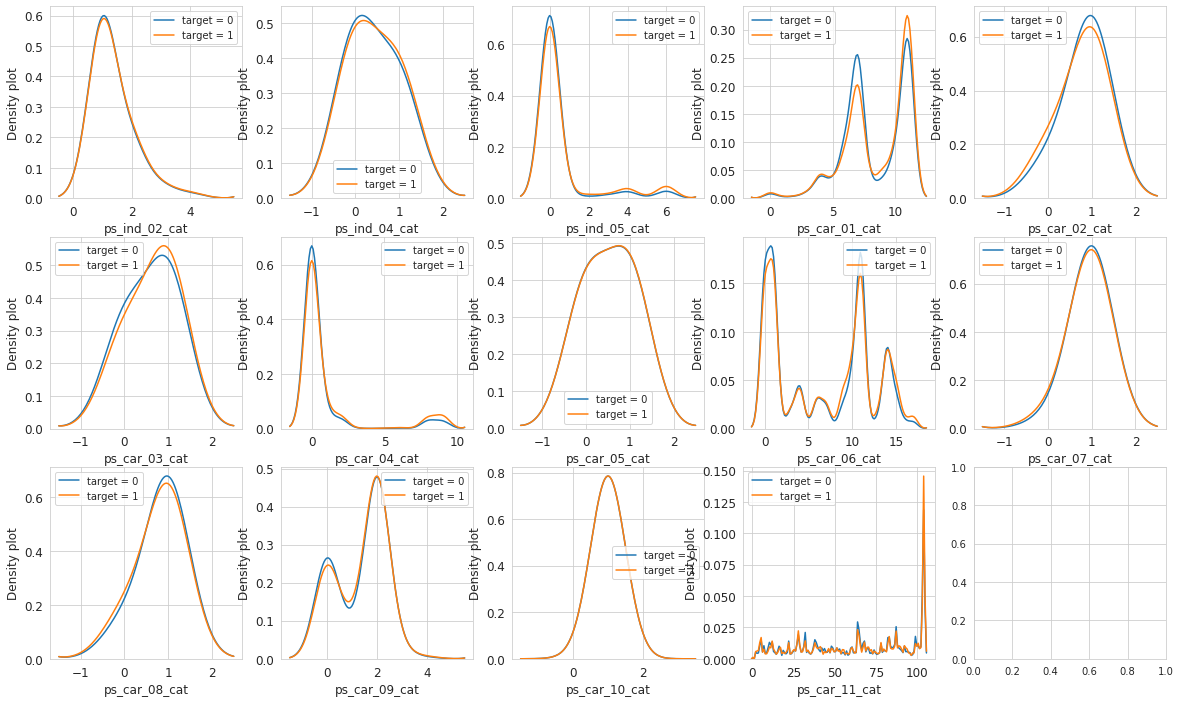

In [71]:
var = meta_train[(meta_train.level == 'nominal') & (meta_train.keep)].index

i = 0
t0 = train_copy.loc[train_copy.target == 0]
t1 = train_copy.loc[train_copy.target == 1]

plt.figure()
f, ax = plt.subplots(3, 5, figsize = (20, 12))

for v in var:
  i += 1
  plt.subplot(3, 5, i)
  sns.kdeplot(t0[v], bw = 0.5, label = 'target = 0')
  sns.kdeplot(t1[v], bw = 0.5, label = 'target = 1')
  plt.ylabel('Density plot', fontsize = 12)
  plt.xlabel(v, fontsize = 12)
  locs, labels = plt.xticks()
  plt.tick_params(axis = 'both', which = 'major', labelsize = 12)

In [0]:
reg_col = [col for col in train.columns if 'reg' in col]
ind_col = [col for col in train.columns if 'ind' in col]
car_col = [col for col in train.columns if 'car' in col]
calc_col = [col for col in train.columns if 'calc' in col]

## Reg 변수

<Figure size 432x288 with 0 Axes>

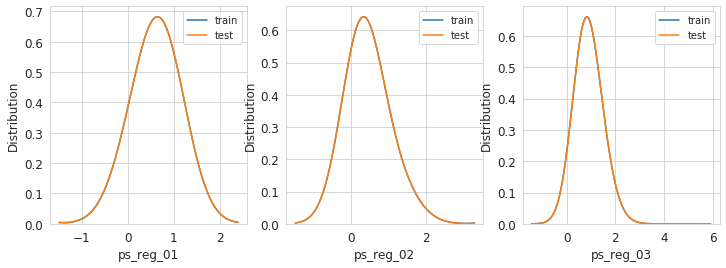

In [73]:
plt.figure()

f, ax = plt.subplots(1, 3, figsize = (12, 4))
i = 0

for reg in reg_col:
  i += 1
  plt.subplot(1, 3, i)
  sns.kdeplot(train_copy[reg], bw = 0.5, label = 'train')
  sns.kdeplot(test_copy[reg], bw = 0.5, label = 'test')
  plt.ylabel('Distribution', fontsize = 12)
  plt.xlabel(reg, fontsize = 12)
  locs, labels = plt.xticks()
  plt.tick_params(axis = 'both', which = 'major', labelsize = 12)

## Ind 변수

<Figure size 432x288 with 0 Axes>

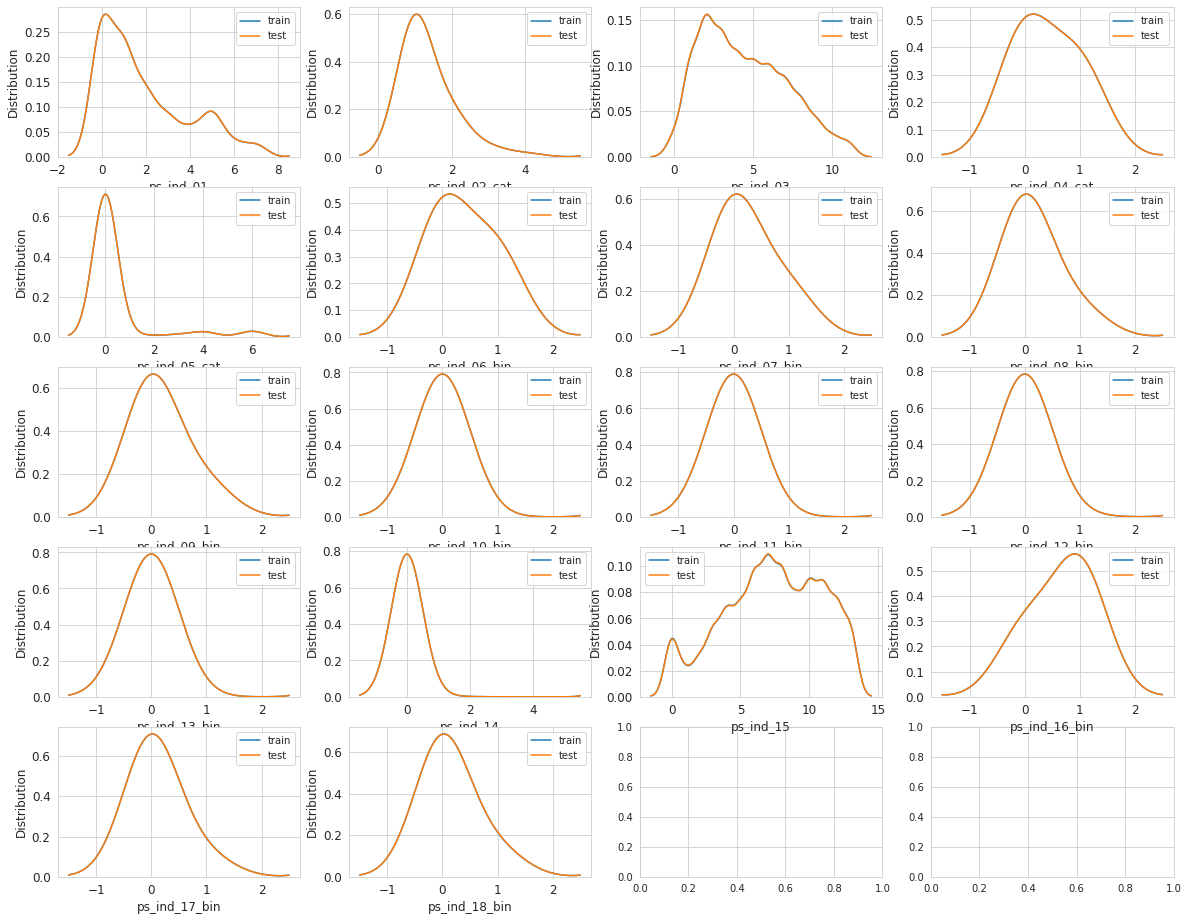

In [74]:
plt.figure()

f, ax = plt.subplots(5, 4, figsize = (20, 16))
i = 0

for ind in ind_col:
  i += 1
  plt.subplot(5, 4, i)
  sns.kdeplot(train_copy[ind], bw = 0.5, label = 'train')
  sns.kdeplot(test_copy[ind], bw = 0.5, label = 'test')
  plt.ylabel('Distribution', fontsize = 12)
  plt.xlabel(ind, fontsize = 12)
  locs, labels = plt.xticks()
  plt.tick_params(axis = 'both', which = 'major', labelsize = 12)

## Car 변수

<Figure size 432x288 with 0 Axes>

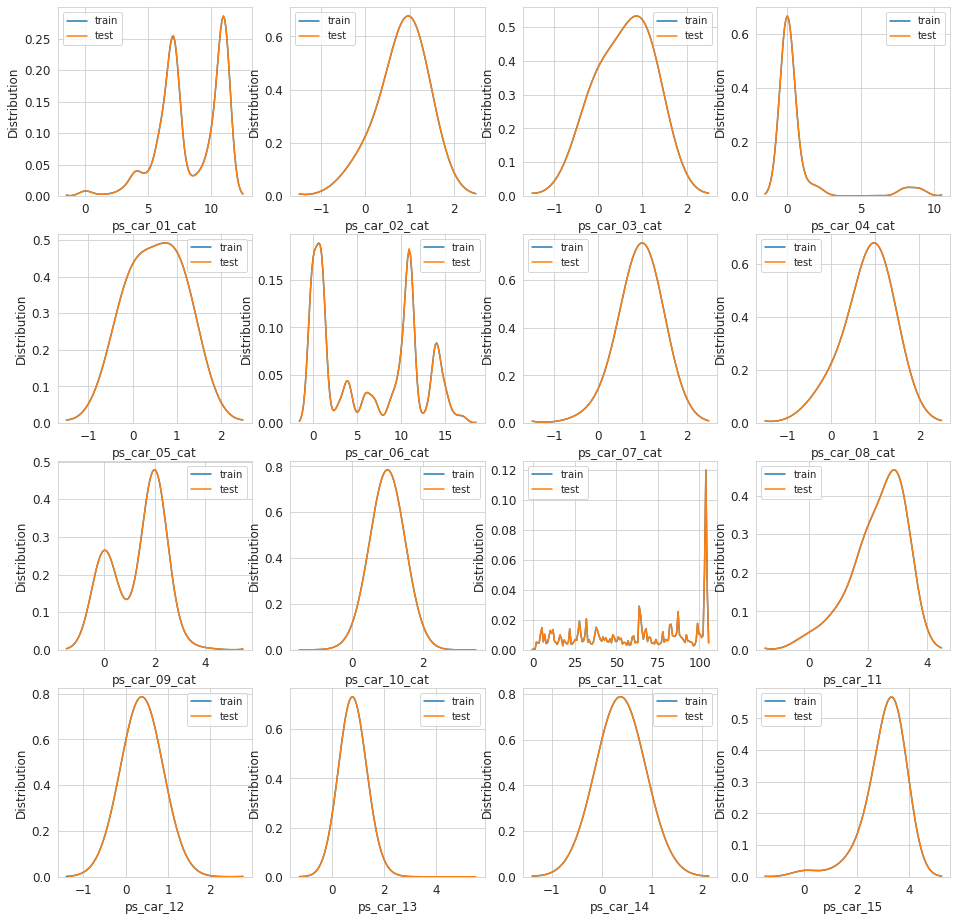

In [75]:
plt.figure()

f, ax = plt.subplots(4, 4, figsize = (16, 16))
i = 0

for car in car_col:
  i += 1
  plt.subplot(4, 4, i)
  sns.kdeplot(train_copy[car], bw = 0.5, label = 'train')
  sns.kdeplot(test_copy[car], bw = 0.5, label = 'test')
  plt.ylabel('Distribution', fontsize = 12)
  plt.xlabel(car, fontsize = 12)
  locs, labels = plt.xticks()
  plt.tick_params(axis = 'both', which = 'major', labelsize = 12)

## Calc 변수

<Figure size 432x288 with 0 Axes>

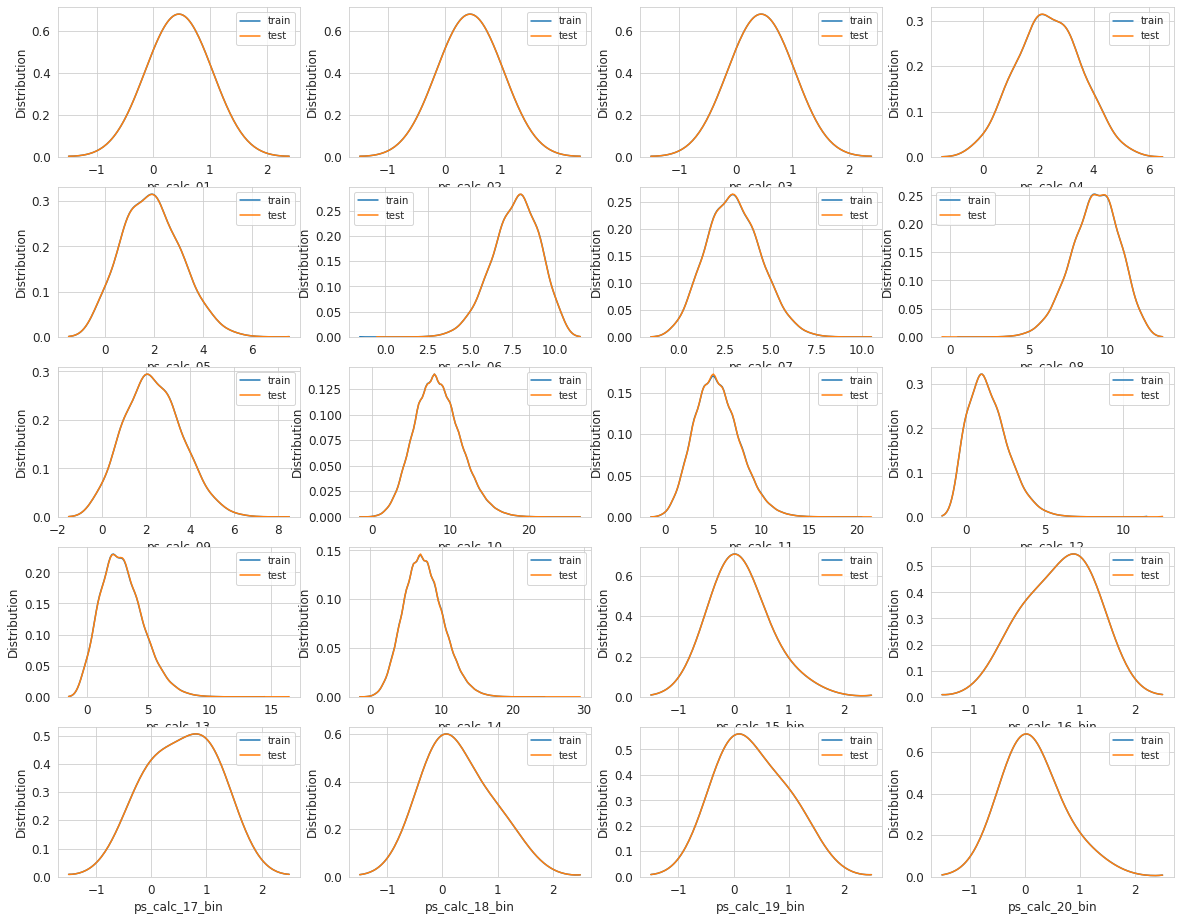

In [76]:
plt.figure()

f, ax = plt.subplots(5, 4, figsize = (20, 16))
i = 0

for calc in calc_col:
  i += 1
  plt.subplot(5, 4, i)
  sns.kdeplot(train_copy[calc], bw = 0.5, label = 'train')
  sns.kdeplot(test_copy[calc], bw = 0.5, label = 'test')
  plt.ylabel('Distribution', fontsize = 12)
  plt.xlabel(calc, fontsize = 12)
  locs, labels = plt.xticks()
  plt.tick_params(axis = 'both', which = 'major', labelsize = 12)

### Reference
- [Porto Seguro Exploratory Analysis and Prediction](https://www.kaggle.com/gpreda/porto-seguro-exploratory-analysis-and-prediction)